<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/03/hbayes_binom_rats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We fit a hierarchical beta-binomial model to some count data derived from rat survival. (In the book, we motivate this in terms of covid incidence rates.)
Based on 
https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-hierarchical-binomial-model.html


In [ ]:
import sklearn
import scipy.stats as stats
import scipy.optimize
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import os
import pandas as pd

In [ ]:


try:
    import pymc3 as pm
except ModuleNotFoundError:
    %pip install -qq pymc3
    import pymc3 as pm
print(pm.__version__)

try:
    import arviz as az
except ModuleNotFoundError:
    %pip install -qq arviz
    import arviz as az
print(az.__version__)

3.11.2
0.11.2


In [ ]:



import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
#import seaborn as sns
try:
    import pymc3 as pm
except ModuleNotFoundError:
    %pip install -qq pymc3
    import pymc3 as pm
try:
    import arviz as az
except ModuleNotFoundError:
    %pip install -qq arviz
    import arviz as az
try:
    import theano.tensor as tt
except ModuleNotFoundError:
    %pip install -qq theano
    import theano.tensor as tt

In [ ]:
# fmt: off
np.random.seed(123)
# rat data (BDA3, p. 102)
y = np.array( [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 2, 5, 3, 2, 7, 7, 3, 3, 2, 9, 10, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 4, 5, 11, 12, 5, 5, 6, 5, 6, 6, 6, 6, 16, 15, 15, 9, 4, ] )
n = np.array( [ 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 18, 18, 17, 20, 20, 20, 20, 19, 19, 18, 18, 25, 24, 23, 20, 20, 20, 20, 20, 20, 10, 49, 19, 46, 27, 17, 49, 47, 20, 20, 13, 48, 50, 20, 20, 20, 20, 20, 20, 20, 48, 19, 19, 19, 22, 46, 49, 20, 20, 23, 19, 22, 20, 20, 20, 52, 46, 47, 24, 14, ] )
N = len(n)
# fmt: on

In [ ]:
def logp_ab(value):
    """prior density"""
    return tt.log(tt.pow(tt.sum(value), -5 / 2))


with pm.Model() as model:
    # Uninformative prior for alpha and beta
    ab = pm.HalfFlat("ab", shape=2, testval=np.asarray([1.0, 1.0]))
    pm.Potential("p(a, b)", logp_ab(ab))
    alpha = pm.Deterministic("alpha", ab[0])
    beta = pm.Deterministic("beta", ab[1])
    X = pm.Deterministic("X", tt.log(ab[0] / ab[1]))
    Z = pm.Deterministic("Z", tt.log(tt.sum(ab)))

    theta = pm.Beta("theta", alpha=ab[0], beta=ab[1], shape=N)

    p = pm.Binomial("y", p=theta, observed=y, n=n)
    # trace = pm.sample(1000, tune=2000, target_accept=0.95)
    trace = pm.sample(1000, tune=500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, ab]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


             mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
ab[0]       2.285  0.705   1.155    3.693  ...    0.026     380.0     528.0    1.0
ab[1]      13.769  4.376   6.333   22.154  ...    0.159     397.0     506.0    1.0
alpha       2.285  0.705   1.155    3.693  ...    0.026     380.0     528.0    1.0
beta       13.769  4.376   6.333   22.154  ...    0.159     397.0     506.0    1.0
X          -1.792  0.110  -2.000   -1.578  ...    0.002    1536.0    1441.0    1.0
...           ...    ...     ...      ...  ...      ...       ...       ...    ...
theta[66]   0.270  0.053   0.176    0.371  ...    0.001    1924.0    1206.0    1.0
theta[67]   0.279  0.059   0.173    0.385  ...    0.001    1928.0    1023.0    1.0
theta[68]   0.275  0.056   0.180    0.383  ...    0.001    1409.0    1269.0    1.0
theta[69]   0.288  0.074   0.153    0.425  ...    0.001    1361.0    1149.0    1.0
theta[70]   0.209  0.077   0.072    0.355  ...    0.001    1704.0     822.0    1.0

[77

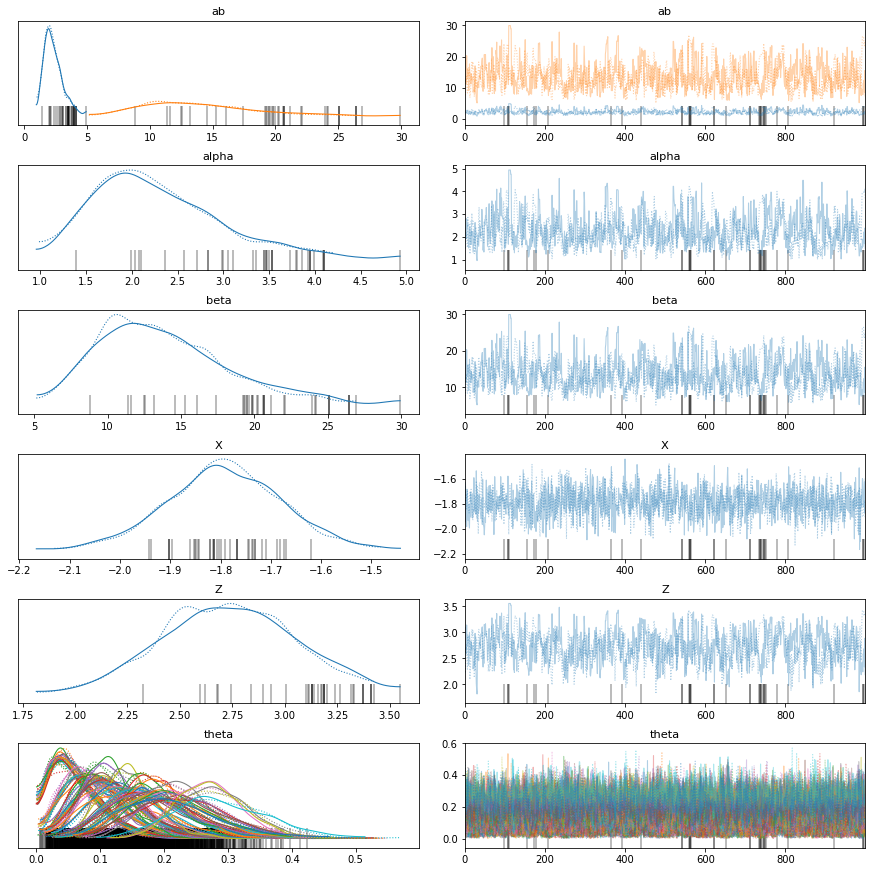

In [ ]:
az.plot_trace(trace)
plt.savefig("hbayes_binom_rats_trace.png", dpi=300)

print(az.summary(trace))

In [ ]:
!ls

hbayes_binom_rats_trace.png  sample_data


post mean
[0.06165285 0.06209179 0.06249498 0.06219465 0.06022995 0.06255777
 0.06164838 0.06327575 0.06465686 0.06351028 0.06333434 0.0659995
 0.06527241 0.06793269 0.09016638 0.09022209 0.08909435 0.08898105
 0.09253411 0.09422614 0.0977361  0.09510004 0.10446713 0.10759323
 0.11087827 0.11962881 0.11864461 0.11709105 0.11766299 0.11826686
 0.11809571 0.12520729 0.11106424 0.12135935 0.11750879 0.12135598
 0.1310315  0.14319236 0.14632288 0.14614197 0.14630019 0.14749157
 0.17459389 0.18594023 0.17427627 0.17551521 0.17630513 0.1752244
 0.17395244 0.17569121 0.17711694 0.19249357 0.18161606 0.18368988
 0.17869469 0.19331308 0.21462783 0.22167791 0.20262534 0.2043273
 0.21425832 0.20821414 0.21805169 0.23147269 0.23414802 0.23021472
 0.26963507 0.27906669 0.27505595 0.28814994 0.20892171]
hyper mean
0.14235314360269444
pooled mle
0.1535365152386429


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


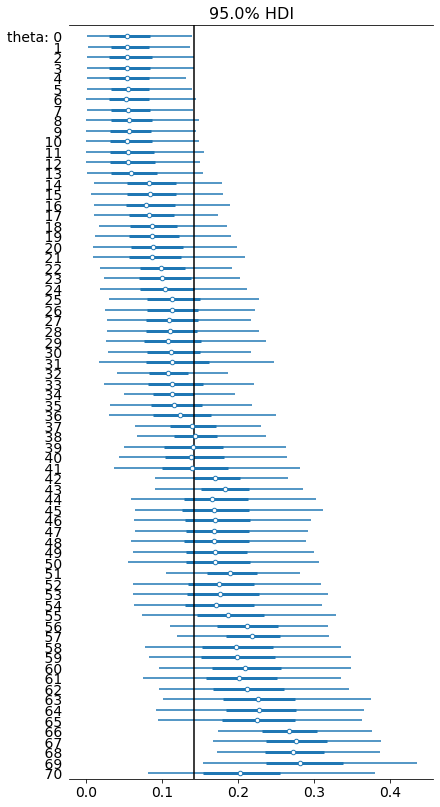

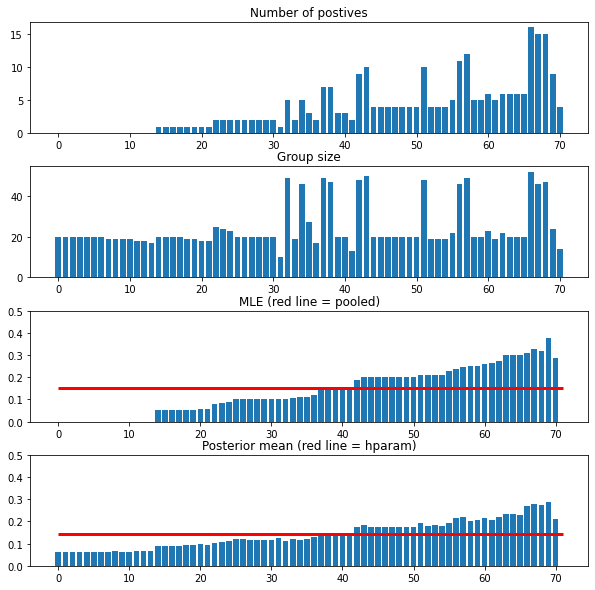

In [ ]:
J = len(n)
post_mean = np.zeros(J)
samples = trace[theta]
post_mean = np.mean(samples, axis=0)
print("post mean")
print(post_mean)

alphas = trace["alpha"]
betas = trace["beta"]
alpha_mean = np.mean(alphas)
beta_mean = np.mean(betas)
hyper_mean = alpha_mean / (alpha_mean + beta_mean)
print("hyper mean")
print(hyper_mean)


mle = y / n
pooled_mle = np.sum(y) / np.sum(n)

print("pooled mle")
print(pooled_mle)


# axes = az.plot_forest(
#    trace, var_names='theta', credible_interval=0.95, combined=True, colors='cycle')

axes = az.plot_forest(trace, var_names="theta", hdi_prob=0.95, combined=True, colors="cycle")

y_lims = axes[0].get_ylim()
axes[0].vlines(hyper_mean, *y_lims)
plt.savefig("hbayes_binom_rats_forest95.pdf", dpi=300)


J = len(n)
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)
axs = np.reshape(axs, 4)
xs = np.arange(J)
ax = axs[0]
ax.bar(xs, y)
ax.set_title("Number of postives")
ax = axs[1]
ax.bar(xs, n)
ax.set_title("Group size")
ax = axs[2]
ax.bar(xs, mle)
ax.set_ylim(0, 0.5)
ax.hlines(pooled_mle, 0, J, "r", lw=3)
ax.set_title("MLE (red line = pooled)")
ax = axs[3]
ax.bar(xs, post_mean)
ax.hlines(hyper_mean, 0, J, "r", lw=3)
ax.set_ylim(0, 0.5)
ax.set_title("Posterior mean (red line = hparam)")
plt.savefig("hbayes_binom_rats_barplot.pdf", dpi=300)